In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
# lOAD THRE DATASET
df = pd.read_csv(r"C:\Users\HP\Desktop\NLP Project\drugsCom_raw.tsv",delimiter='\t')

In [4]:
df.shape

(161297, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [7]:
# DEFINE THE CONDITION
conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']

In [8]:
#  FILTER THE DATASET FOR THE SPECIFIED CONDITION   
filtered_data = df[df['condition'].isin(conditions)]

In [9]:
filtered_data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [10]:
# SHAPE OF FILTRED DATA 
filtered_data.shape

(13944, 7)

In [11]:
filtered_data['condition'].unique().tolist()

['Depression', 'Diabetes, Type 2', 'High Blood Pressure']

In [12]:
filtered_data['review'].tolist()

['"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."',
 '"1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."',
 '"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would ge

In [13]:
filtered_data['condition'].value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

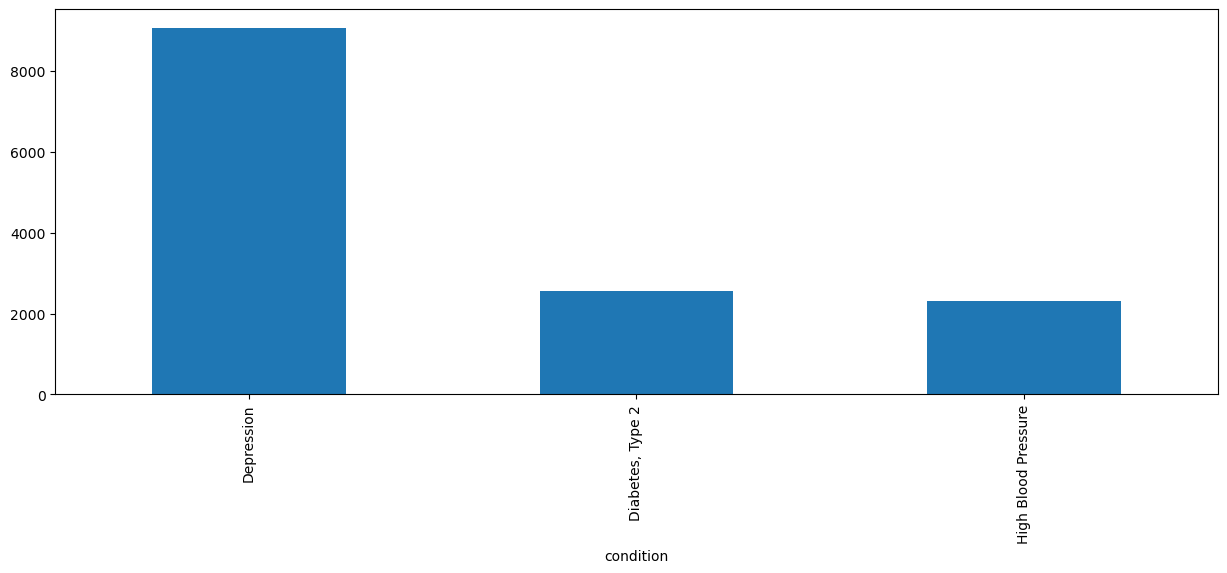

In [14]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
filtered_data["condition"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

<Figure size 1000x500 with 0 Axes>

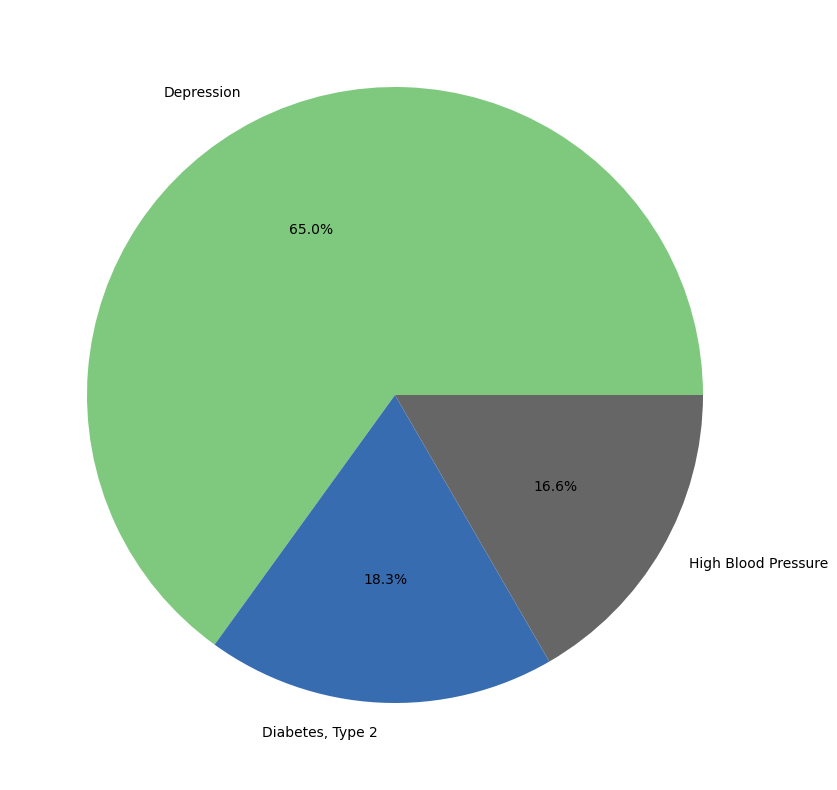

In [15]:
plt.figure(figsize=(10,5))
counts = filtered_data["condition"].value_counts()
labels = filtered_data["condition"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

In [16]:
# Step 5: Text Preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
import nltk

# Download the punkt tokenizer if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#preprocessing the review for cleaning purpose using regular expression and Laemmitization
def Clean_text(text):
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+', ' ', text)  
    text = text.lower() 
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [20]:
#creation column for cleaned text review
filtered_data['cleaned_review'] = df['review'].apply(Clean_text)

In [21]:
# REMOVE THE UNNECESSARY COLUMN
filtered_data.drop(columns=['Unnamed: 0', 'review','date'],inplace=True)

In [22]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(filtered_data['cleaned_review'])
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Step 2: Apply Label Encoding to the target variable
lb = LabelEncoder()
filtered_data['condition'] = lb.fit_transform(filtered_data['condition'])

In [24]:
filtered_data

,drugName,condition,rating,usefulCount,cleaned_review
11,L-methylfolate,0,10.0,54,taken anti depressant year improvement mostly ...
31,Sertraline,0,8.0,3,1 week zoloft anxiety mood swing take 50mg mor...
44,Venlafaxine,0,4.0,3,gp started venlafaxine yesterday help depressi...
50,Dulaglutide,1,10.0,24,hey guy 039 4 month since last post wanted giv...
67,Effexor XR,0,10.0,166,medicine saved life wit end anti depressant re...
...,...,...,...,...,...
161251,Metoprolol,2,4.0,39,fourth blood pressure pill feel like partly wo...
161258,Bystolic,2,1.0,25,bystolic foot arm numb blood sugar became seve...
161278,Invokana,1,9.0,47,got diagnosed type 2 doctor prescribed invokan...
161286,Vortioxetine,0,2.0,33,third med 039 tried anxiety mild depression we...


In [25]:
x = tfidf_matrix
y = filtered_data['condition']

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0, test_size=0.2)

In [27]:
#Model Building XGBoost 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(xtrain, ytrain)

# Predictions and accuracy
y_pred_train_gb = gb.predict(xtrain)
y_pred_test_gb = gb.predict(xtest)

from sklearn.metrics import accuracy_score
Train_accuracy_gb = accuracy_score(ytrain, y_pred_train_gb)
Test_accuracy_gb = accuracy_score(ytest, y_pred_test_gb)

print("Gradient Boosting Training Accuracy:", Train_accuracy_gb)
print("Gradient Boosting Testing Accuracy:", Test_accuracy_gb)

Gradient Boosting Training Accuracy: 0.9388614970865083
Gradient Boosting Testing Accuracy: 0.9236285406955899


In [28]:
# Find the most common drug for each condition
# drug_recommendations = sorted_df.groupby('useful')['drugName'].agg(lambda x: x.value_counts().idxmax())
drug_recommendations = filtered_data.groupby('condition')['drugName'].agg(lambda x: x.value_counts().idxmax()).to_dict()


# Map predictions to drug recommendations
def recommend_drug(predicted_condition):
    return drug_recommendations.get(predicted_condition, "No recommendation available")

# Example: Recommend a drug for a single review
predicted_condition = gb.predict(xtest[10])  # Example prediction
recommended_drug = recommend_drug(predicted_condition[0])
print(f"Condition: {predicted_condition[0]}, Recommended Drug: {recommended_drug}")
if (predicted_condition==0):
    print("condition is :  Dipression")
elif (predicted_condition==1):
      print("condition is :  Dibetic Type 2")
elif (predicted_condition==2):
     print("condition is :  High Blood Pressure")
else:
     print("Healthy")   

Condition: 1, Recommended Drug: Liraglutide
condition is :  Dibetic Type 2


In [29]:
import joblib

# Save model, TF-IDF vectorizer, and drug recommendations
joblib.dump(gb, "gb.pkl")
joblib.dump(tf, "tf.pkl")
joblib.dump(drug_recommendations, "drug_recommendations.pkl")

['drug_recommendations.pkl']